<a href="https://colab.research.google.com/github/krishshhah/Step_Classifier/blob/main/Step_count.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import math

In [4]:
file_path = '/content/sensordata1.xlsx'
df = pd.read_excel(file_path) # reading file data

df

,timestamp,ax,ay,az,gx,gy,gz,Time Difference
0,1735445401,-0.95,0.02,0.23,0.49,-7.08,4.33,0.089
1,1735445401,-0.97,-0.01,0.23,0.61,-3.11,2.56,0.120
2,1735445401,-0.94,-0.05,0.08,-0.61,-3.78,2.32,0.091
3,1735445401,-1.17,-0.06,-0.02,-0.49,-21.06,7.87,0.123
4,1735445402,-1.06,-0.07,0.39,17.82,-68.54,7.81,0.116
...,...,...,...,...,...,...,...,...
1279,1735445538,-1.01,-0.06,0.30,34.85,-107.79,-5.00,0.119
1280,1735445538,-0.96,-0.16,0.17,10.01,-43.09,3.60,0.091
1281,1735445538,-0.88,-0.22,-0.08,18.98,-16.60,-1.77,0.120
1282,1735445538,-1.09,0.02,0.12,24.60,-47.55,6.29,0.089


In [5]:
df = df.drop(['timestamp'], axis=1) # cleaning

In [6]:
# creating some features
df.rename(columns={'Time Difference': 'time_difference'}, inplace=True)

df['a_mag'] = np.sqrt(df['ax']**2 + df['ay']**2 + df['az']**2) # magnitude of acceleration
df['g_mag'] = np.sqrt(df['gx']**2 + df['gy']**2 + df['gz']**2) # magnitude of angular velocity

df['cumulative_time'] = df['time_difference'].cumsum()
df['a_mag_smooth'] = df['a_mag'].rolling(window=2, center=True).mean() # smoothing out data
df['g_mag_smooth'] = df['g_mag'].rolling(window=2, center=True).mean()
df['a_mag_var'] = df['a_mag'].rolling(window=2).var()

# jerk = rate of change of acceleration (3rd derivative of time)
df['jerk'] = df['a_mag_smooth'].diff()

In [7]:
df_10s = df[df['cumulative_time'] < 10] # focusing on first 10 seconds for testing/graphing purposes

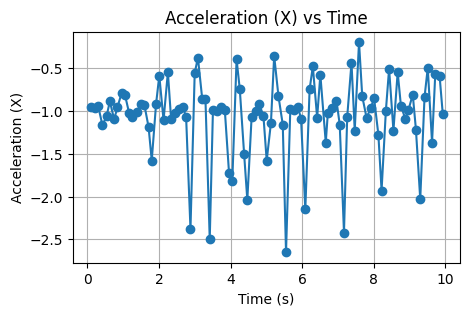

In [8]:
plt.figure(figsize=(5, 3))
plt.plot(df_10s['cumulative_time'], df_10s['ax'], marker='o', linestyle='-')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (X)')
plt.title('Acceleration (X) vs Time')
plt.grid(True)
plt.show()

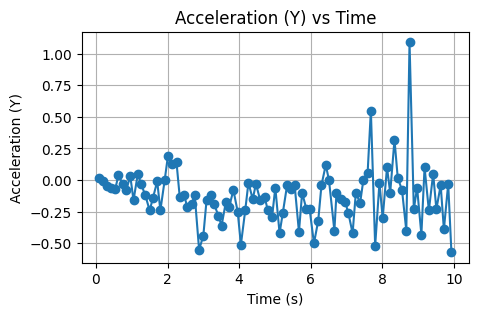

In [9]:
plt.figure(figsize=(5, 3))
plt.plot(df_10s['cumulative_time'], df_10s['ay'], marker='o', linestyle='-')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (Y)')
plt.title('Acceleration (Y) vs Time')
plt.grid(True)
plt.show()

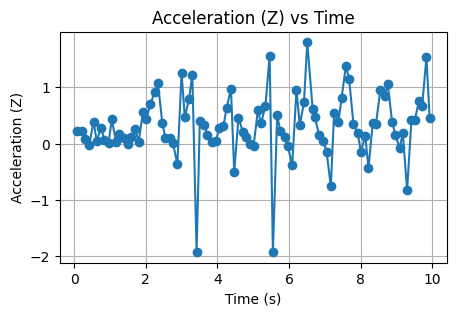

In [10]:
plt.figure(figsize=(5, 3))
plt.plot(df_10s['cumulative_time'], df_10s['az'], marker='o', linestyle='-')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (Z)')
plt.title('Acceleration (Z) vs Time')
plt.grid(True)
plt.show()

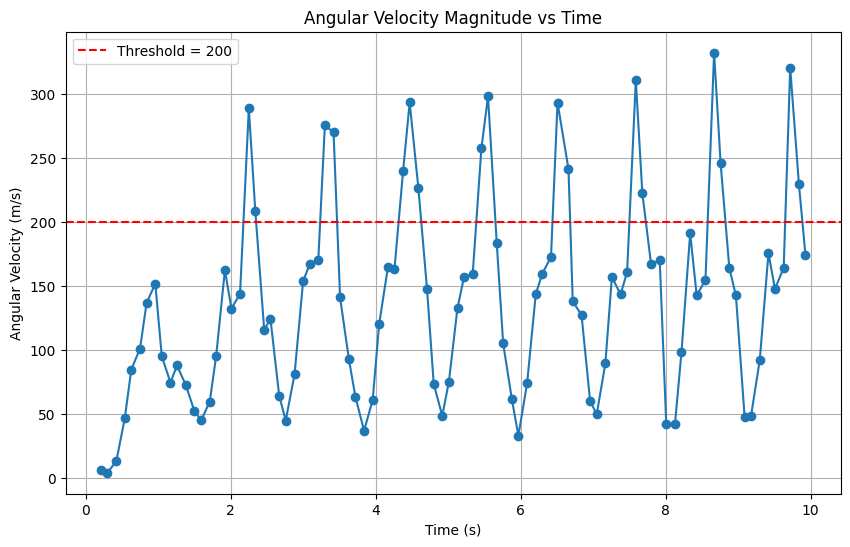

In [11]:
# plots the magnitude of angular velocity against cumulative time
plt.figure(figsize=(10, 6))
plt.plot(df_10s['cumulative_time'], df_10s['g_mag_smooth'], marker='o', linestyle='-')
plt.axhline(y=200, color='red', linestyle='--', label='Threshold = 200')      # Threshold at 200
plt.xlabel('Time (s)')
plt.ylabel('Angular Velocity (m/s)')
plt.title('Angular Velocity Magnitude vs Time')
plt.legend()
plt.grid(True)
plt.show()

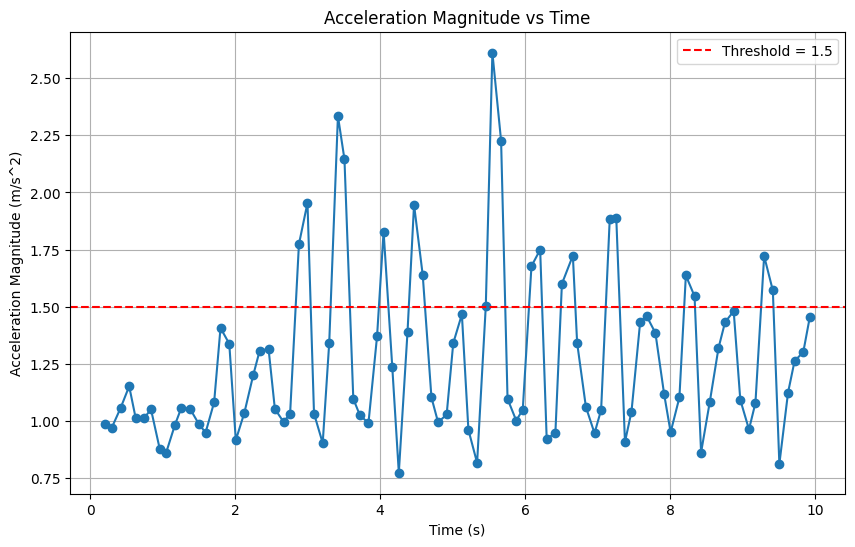

In [12]:
# plots the magnitude of acceleration against cumulative time
plt.figure(figsize=(10, 6))
plt.plot(df_10s['cumulative_time'], df_10s['a_mag_smooth'], marker='o', linestyle='-')
plt.axhline(y=1.5, color='red', linestyle='--', label='Threshold = 1.5')      # Threshold at 1.5
plt.xlabel('Time (s)')
plt.ylabel('Acceleration Magnitude (m/s^2)')
plt.title('Acceleration Magnitude vs Time')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
df_10s

,ax,ay,az,gx,gy,gz,time_difference,a_mag,g_mag,cumulative_time,a_mag_smooth,g_mag_smooth,a_mag_var,jerk
0,-0.95,0.02,0.23,0.49,-7.08,4.33,0.089,0.977650,8.313567,0.089,NaN,NaN,NaN,NaN
1,-0.97,-0.01,0.23,0.61,-3.11,2.56,0.120,0.996945,4.074040,0.209,0.987298,6.193803,0.000186,NaN
2,-0.94,-0.05,0.08,-0.61,-3.78,2.32,0.091,0.944722,4.476930,0.300,0.970834,4.275485,0.001364,-0.016464
3,-1.17,-0.06,-0.02,-0.49,-21.06,7.87,0.123,1.171708,22.487788,0.423,1.058215,13.482359,0.025761,0.087381
4,-1.06,-0.07,0.39,17.82,-68.54,7.81,0.116,1.131636,71.248018,0.539,1.151672,46.867903,0.000803,0.093457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,-0.50,-0.23,0.41,-64.45,-22.89,-23.13,0.090,0.686294,72.199387,9.509,0.811175,147.654075,0.031190,-0.759962
89,-1.37,-0.04,0.75,-68.36,244.14,-34.36,0.120,1.562370,255.847687,9.629,1.124332,164.023537,0.383754,0.313157
90,-0.57,-0.39,0.67,-14.22,382.32,-34.55,0.090,0.962237,384.141241,9.719,1.262303,319.994464,0.180080,0.137971
91,-0.59,-0.03,1.53,48.34,-44.25,-35.77,0.120,1.640091,74.661309,9.839,1.301164,229.401275,0.229743,0.038861


In [14]:
# METHOD 1: iteratively finding peaks and testing if they are not kicks
# ASSUMES ANGULAR VELOCITY IS FOR KICKS, ACCELERATION IS FOR KICKS + STEPS
steps = []
kicks = []
for i in range(1, len(df['a_mag_smooth']) - 1):
    current = df['a_mag_smooth'][i]
    previous = df['a_mag_smooth'][i - 1]
    next = df['a_mag_smooth'][i + 1]

    if current > 1.5 and previous < current and next < current: # finds peaks in data
      if abs(df['g_mag_smooth'].iloc[i]) < 200.0: # where there is no kick!
        steps.append(current)
      else:
        kicks.append(df['g_mag_smooth'].iloc[i])

print('Number of steps: ' + str(len(steps)) + ' in ' + str(round(df['cumulative_time'].iloc[-1], 2)) + ' seconds')
print('Number of kicks: ' + str(len(kicks)) + ' in ' + str(round(df['cumulative_time'].iloc[-1], 2)) + ' seconds')

Number of steps: 132 in 137.4 seconds
Number of kicks: 106 in 137.4 seconds


In [15]:
# METHOD 2: using libraries to find acceleration peaks which are not kicks
from scipy.signal import find_peaks

acceleration_peaks, _ = find_peaks(df['a_mag_smooth'], height=1.5, distance=1, prominence=0.3)
gyro_peaks, _ = find_peaks(df['g_mag_smooth'], height=200, distance=1, prominence=0.3)

threshold = 1 # some readings on gyro may come before/after kick

all_gyro_peaks = np.unique(np.concatenate([gyro_peaks, np.array(gyro_peaks) - threshold, np.array(gyro_peaks) + threshold]))

print(acceleration_peaks)
print(all_gyro_peaks)

steps = list(set(acceleration_peaks) - set(all_gyro_peaks)) # finding steps which aren't kicks (set theory expection A-B)

# finding times and the magnitudes of each kick
step_times = df['cumulative_time'].iloc[steps]
step_magnitudes = df['a_mag_smooth'].iloc[steps]

print(step_times)
print(step_magnitudes)
print('Number of steps: ' + str(len(steps)) + ' in ' + str(round(df['cumulative_time'].iloc[-1], 2)) + ' seconds')

[  27   31   37   41   51   57   61   67   76   86   96  100  106  110
  116  120  126  130  136  140  146  150  156  160  166  170  176  180
  186  195  199  205  209  215  219  224  234  238  244  248  253  263
  267  273  278  283  287  293  297  303  307  313  317  322  332  336
  342  346  356  362  366  372  376  382  386  392  396  402  406  411
  421  431  437  441  445  451  455  460  465  470  474  480  485  489
  493  498  502  508  512  518  522  527  531  537  546  550  556  560
  566  570  575  579  585  589  594  599  604  608  614  619  623  627
  633  637  642  647  652  655  662  666  672  675  681  685  691  695
  700  704  710  714  719  723  729  733  738  742  748  752  757  767
  771  776  781  786  789  795  799  804  808  814  818  823  827  833
  837  842  846  851  855  861  865  870  874  879  883  889  893  899
  908  912  918  922  928  937  941  947  951  957  961  967  971  976
  982  986  990  996 1000 1006 1010 1016 1020 1026 1031 1035 1040 1045
 1049 

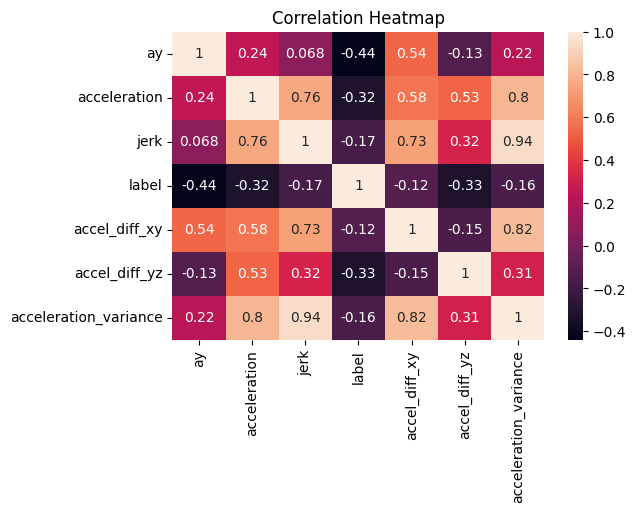

In [16]:
# METHOD 3: Using a classifier -- but needs real data of what an actual kick is to find deeper relations in data

all_acceleration_peaks, _ = find_peaks(df['a_mag_smooth'], height=1.5, distance=1, prominence=0.3)

features = []
for i in all_acceleration_peaks:
    ay_value = df['ay'].iloc[i]
    peak_height = df['a_mag_smooth'].iloc[i]
    gyro_value = df['g_mag_smooth'].iloc[i]
    jerk_value = df['jerk'].iloc[i]
    accel_diff_xy = abs(df['ax'].iloc[i] - df['ay'].iloc[i])
    accel_diff_yz = abs(df['ay'].iloc[i] - df['az'].iloc[i])
    a_mag_var = df['a_mag'].iloc[i]

    features.append({
        'ay': ay_value,
        'acceleration': peak_height,
        'jerk': jerk_value,
        'label': 1 if gyro_value < 200 else 0,  # step vs kick labeling
        'accel_diff_xy': accel_diff_xy,
        'accel_diff_yz': accel_diff_yz,
        'acceleration_variance': a_mag_var
    })

df_features = pd.DataFrame(features)

import seaborn as sns

corr = df_features.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split

X = df_features[['acceleration_variance', 'accel_diff_xy', 'acceleration', 'jerk']]
y = df_features['label']

print(df_features['label'].value_counts())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

from sklearn.ensemble import RandomForestClassifier # gives the highest f1 score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

#clf = LogisticRegression(random_state=42, max_iter=1000) # Logistic Regression
#clf = SVC(kernel='rbf', random_state=69)  # Support Vector Machine (SVM)
#clf = XGBClassifier(random_state=69, eval_metric='logloss') # Gradient Boosting - XG Boost
clf = RandomForestClassifier(n_estimators=100, random_state=69) # Random Forest
clf.fit(X_train, y_train)

y_proba = clf.predict_proba(X_test)
from sklearn.metrics import log_loss
loss = log_loss(y_test, y_proba)

print(f"Cross-entropy loss: {loss:.4f}")

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

label
1    132
0    106
Name: count, dtype: int64
Cross-entropy loss: 0.2557
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        26
           1       0.88      1.00      0.94        22

    accuracy                           0.94        48
   macro avg       0.94      0.94      0.94        48
weighted avg       0.94      0.94      0.94        48

